In [87]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
import numpy as np
import keras
import os
import cv2
from PIL import Image
import numpy as np
from google.colab import drive
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, GlobalAveragePooling2D, Input, InputLayer, BatchNormalization
drive.mount("/content/drive")
from matplotlib import pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
labels_path = "/content/drive/My Drive/ИАД/LR2/Temp/labels.npy"
cells_path = "/content/drive/My Drive/ИАД/LR2/Temp/Cells.npy"

Cells=np.load(cells_path)
labels=np.load("/content/drive/My Drive/ИАД/LR2/Temp/labels_final.npy")

s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

num_classes=len(np.unique(labels))
len_data=len(Cells)
print(num_classes)
print(len_data)

2
27560


In [89]:
(x_train,x_test)=Cells[(int)(0.2*len_data):],Cells[:(int)(0.2*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)
(y_train,y_test)=labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [90]:
print(x_train.shape)
print(x_train[0].shape)

(22048, 50, 50, 3)
(50, 50, 3)


MobileNet edited 1

In [91]:
base_model = MobileNet(weights=None, include_top=False,input_shape=(50, 50, 3)) 

drop_layers = [1,2,3,4,5,6,7,8,9,10]

input_layer = x = base_model.input

for i, layer in enumerate(base_model.layers[1:], 1):
    if i in drop_layers:
        x = layer(x)

x = GlobalAveragePooling2D()(x)

x = keras.layers.Dense(2, activation="softmax")(x)

model = keras.models.Model(inputs = input_layer, outputs = x)

for layer in model.layers[0:4]:
    layer.trainable = False

del base_model
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 51, 51, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 25, 25, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 25, 25, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 25, 25, 32)       

In [93]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=25,epochs=20,validation_split = 0.2, verbose=1)

Epoch 1/20
706/706 [==============================] - 36s 51ms/step - loss: 0.3702 - accuracy: 0.8470 - val_loss: 1.8857 - val_accuracy: 0.5020
Epoch 2/20
706/706 [==============================] - 36s 50ms/step - loss: 0.3408 - accuracy: 0.8651 - val_loss: 0.3331 - val_accuracy: 0.8642
Epoch 3/20
706/706 [==============================] - 34s 49ms/step - loss: 0.3211 - accuracy: 0.8725 - val_loss: 5.4024 - val_accuracy: 0.5020
Epoch 4/20
706/706 [==============================] - 35s 49ms/step - loss: 0.3035 - accuracy: 0.8807 - val_loss: 0.9354 - val_accuracy: 0.6145
Epoch 5/20
706/706 [==============================] - 37s 52ms/step - loss: 0.2923 - accuracy: 0.8879 - val_loss: 0.7198 - val_accuracy: 0.6531
Epoch 6/20
706/706 [==============================] - 35s 49ms/step - loss: 0.2850 - accuracy: 0.8898 - val_loss: 2.9367 - val_accuracy: 0.5020
Epoch 7/20
706/706 [==============================] - 35s 49ms/step - loss: 0.2789 - accuracy: 0.8915 - val_loss: 0.2904 - val_accuracy:

In [94]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

173/173 [==============================] - 3s 19ms/step - loss: 0.5453 - accuracy: 0.8059

 Test_Accuracy:- 0.8058781027793884


In [97]:
from keras.models import load_model
model.save('/content/drive/My Drive/ИАД/LR2/mobilenet4.h5')

MobileNet original

In [ ]:
base_model = MobileNet(weights=None, include_top=False,input_shape=(50, 50, 3)) 

x = base_model.output

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a logistic layer
predictions = Dense(2, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# Compile model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',
                           metrics = ['accuracy', 'mae'])
model.summary()


model.compile(optimizer='rmsprop', loss = 'binary_crossentropy',
                           metrics = ['accuracy', 'mae'])                          

In [ ]:
history = model.fit(x_train,y_train,batch_size=50,epochs=20, validation_split=0.2, verbose=1)

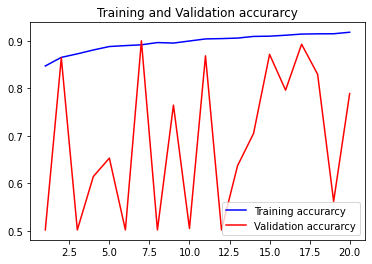

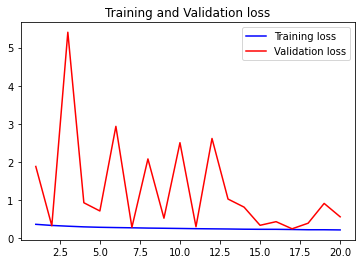

In [98]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()

In [ ]:
from keras.models import load_model
model.save('/content/drive/My Drive/ИАД/LR2/cells_new.h5')

1/1 [==============================] - 0s 983us/step
Uninfected 
Accuracy =  0.8371599


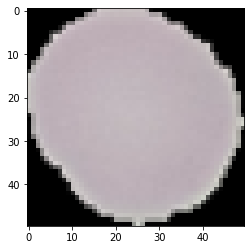

In [103]:
import os
from keras.models import load_model
import random
def convert_to_array(img):
    im = cv2.imread(img)
    img_ = Image.fromarray(im, 'RGB')
    image = img_.resize((50, 50))
    return np.array(image)

def get_cell_name(label):
    if label==1:
        return "Paracitized"
    if label==0:
        return "Uninfected"

#model = load_model('/content/drive/My Drive/ИАД/LR2/cells_new.h5') # MobileNet pretrained
#model = load_model('/content/drive/My Drive/ИАД/LR2/mobilenet2.h5') # Edit 1 (1 block)
#model = load_model('/content/drive/My Drive/ИАД/LR2/mobilenet3.h5') # Edit 2 (1 block)
model = load_model('/content/drive/My Drive/ИАД/LR2/mobilenet4.h5') # Edit 3 (1 block), rmsprop


label=1
a=[]

img = x_train[random.randint(0, len(x_train)-1)]
img= np.expand_dims(img, axis=0)
plt.imshow(img[0])

a.append(img[0])
a=np.array(a)
score=model.predict(a,verbose=1)
label_index=np.argmax(score)
acc=np.max(score)
Cell=get_cell_name(label_index)
print(Cell,"\nAccuracy =  "+ str(acc))

In [104]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

Выделяемые признаки после каждой свертки


Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 51, 51, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 25, 25, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 25, 25, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 25, 25, 32)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


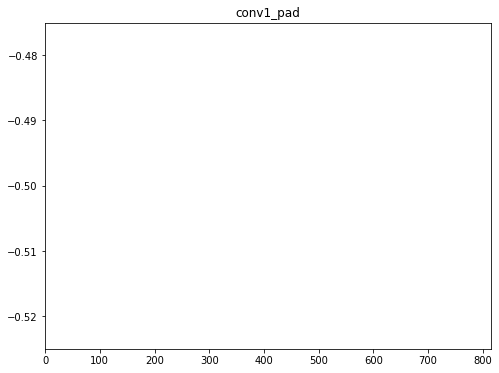

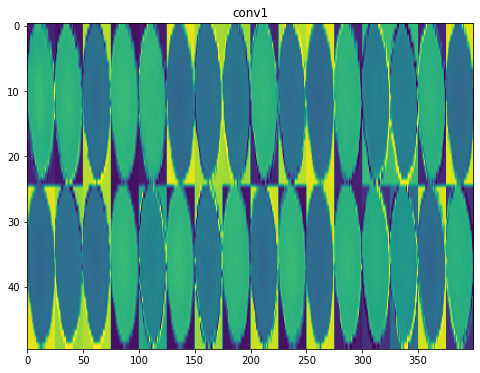

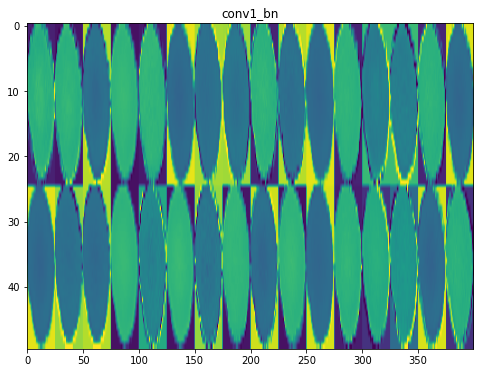

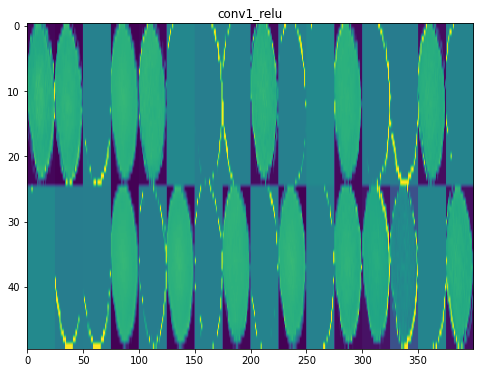

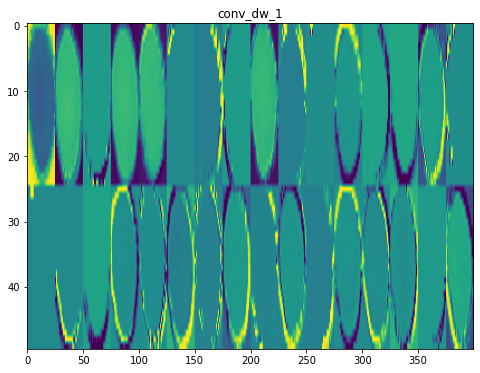

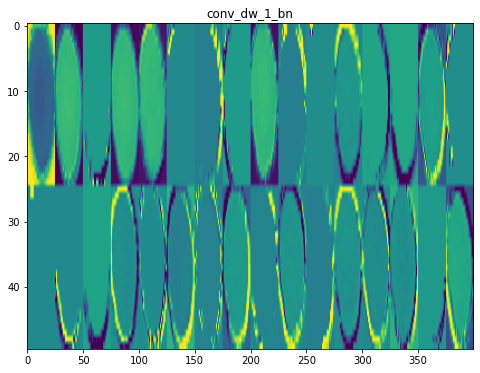

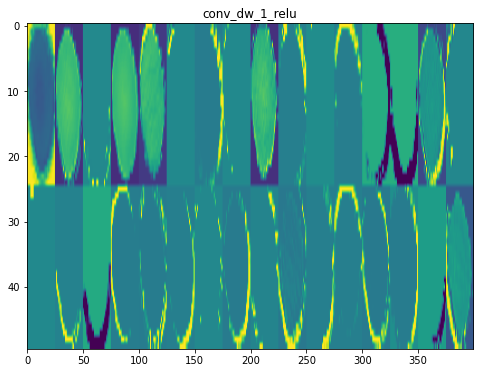

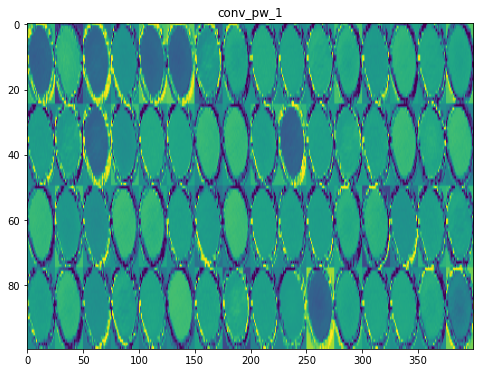

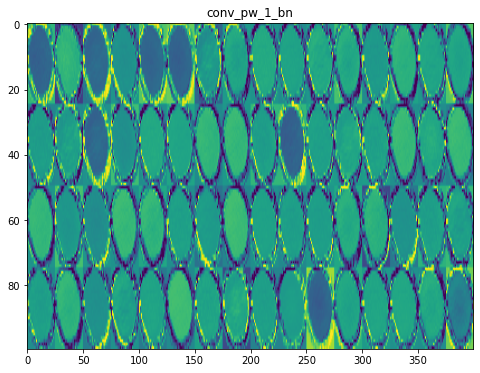

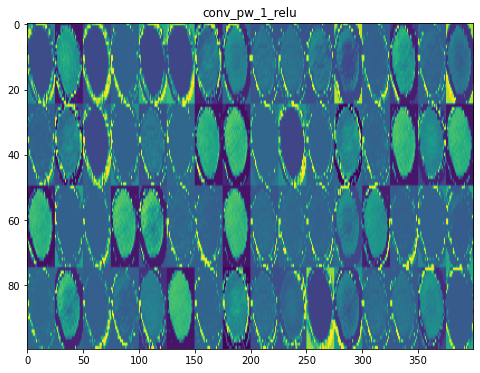

In [105]:
model.summary()

# получения нескольких выходов на предсказании
activations = activation_model.predict(img)
# список всех слоев сети
layer_names = [layer.name for layer in model.layers]


# так как карта признаков извлекает 32 * k признаков, то берем число, которому
# 32 кратно просто для красоты
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  # выводить необходимо только сверточные слои
  if 'conv' not in layer_name:
    continue
  # карта признаков имеет форму (1, size, size, n_features)
  # берем только последнюю ось тензора
  n_features = layer_activation.shape[-1]
  # берем только первую ось тензора
  size = layer_activation.shape[1]

  # количество строчек в таблице отображений
  n_cols = n_features // images_per_row
  # сама таблица инициализируется нулями
  display_grid = np.zeros((size * n_cols, size * images_per_row))

  # обычный вложенный цикл, как в двумерной матрице
  for col in range(n_cols):
    for row in range(images_per_row):
      # это - каждый маленький квадрат в таблице отображений
      # берется каждый признак из последней оси активации (которая кратна 32)
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      # обработка изображения для приемлемого вида
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
  
  # size - размер каждого квадратного изображения без уменьшения
  scale = 1. / size
  # уменьшаем размер общей сетки отображений, чтобы все картинки поместились на ней
  #plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.figure(figsize=(8,6))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

Визуализируем матрицы свертки

In [115]:
# Функция принимает модель, название слоя, количество фильтров
# Функция выводит изображения указанного количество фильтров слоя
# Каждая строка - один фильтр, каждый столбец - один канал
def visualise_layer_filters(model, layer_name, num_filters):
  import matplotlib.pyplot as plt
  layer = model.get_layer(layer_name)
  print(layer.get_weights())
  layer_filters, _ = layer.get_weights()


  # число каналов (столбцов)
  channels = 3
  # число ячеек
  num_cells = channels * num_filters
  for i in range(1, num_cells + 1):
    f = layer_filters[:, :, :, i-1]
    for j in range(columns):
      fig1 = plt.subplot(rows, columns, i)
      # отключение осей
      fig1.set_xticks([]) 
      fig1.set_yticks([])
      # показываем фильтры для всех трех каналов по очереди
      plt.imshow(f[:, :, j], cmap='gray')
  print(f'\nlayer: {layer_name}, filters: {num_filters}')    
  plt.show()    

for layer in model.layers:
  if 'conv' in layer.name:
    visualise_layer_filters(model, layer.name, 6)

[]


ValueError: ignored